In this notebook we give a way to compute a matrix of $Q$, for the bilinear form introduced in *On a quadratic form associated to the nilpotent part of the monodromy of a  curve* by L. Alanis, E. Artal, C. Bonatti, X. Gómez-Mont, M. González Villa and, P. Portilla.

The input is a (reduced) germ of a plane curve singularity. It is introduced via the adjacency matrix $A$ of the dual graph of the minimal dual resolution.
The yellow vertices are the arrows of the graph. We color the vertices that *survive* in the dual graph of the semistable normalization. We introduce manually the position of the vertices to have a better plot. 
<!--Though it is an unoriented graph, we consider the edges oriented lexicographic, except the arrows, where the arrow-head is the end point. The arrows in this example are the first and the last edges, to keep the symmetry.-->

A matrix $A_1$ is defined to take into account the weights which are kept in the list `Vmult`. Since it is reduced for the arrow heads the multiplicies are one.

In [1]:
nres=15
A=Matrix(nres)
A[0,2]=A[1,2]=A[2,3]=A[3,4]=1
A[4,5]=A[5,7]=A[4,6]=A[6,8]=1
A[0,9]=A[0,10]=A[1,11]=A[1,12]=1
A[5,13]=A[6,14]=1
A=A+A.transpose()

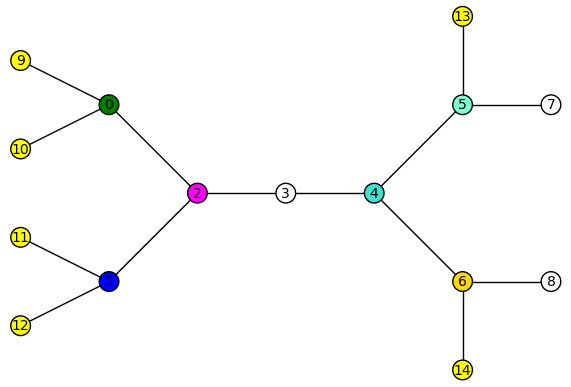

In [2]:
G=Graph(A)
Gv={9:(-3,1.5),10:(-3,.5),11:(-3,-.5),12:(-3,-1.5),13:(2,2),14:(2,-2)}
Gv[0]=(-2,1)
Gv[1]=(-2,-1)
for i in [2..4]:
    Gv[i]=(i-3,0)
Gv[5]=(2,1)
Gv[6]=(2,-1)
Gv[7]=(3,1)
Gv[8]=(3,-1)
G.set_pos(Gv)
Gcolor={'yellow':[9,..,14],'white':[3,7,8], 'green':[0], 'blue':[1], 'magenta': [2], 'turquoise': [4], 'aquamarine': [5], 'gold': [6]}
G.plot(vertex_colors=Gcolor)

In [3]:
Vmult=2*[14]+[12,8,12]+2*[26]+2*[13]+6*[1]
A1=copy(A)
for i in range(nres):
    A1[i,i]=Vmult[i]

From this graph we construct the list `Bamboos` of the bamboos of the graph, presented in a dictionnary with keys starting from 1. The arrowheads are extremities of bamboos and besides them we only consider bamboos joining branching points. Each bamboo is represented by a tuple of vertices (including the extremities). Sometimes the bamboos can be broken into pieces for technical reasons. 

Finally `e` is the `lcm` of the multiplicities of the meaningful vertices. The plot `Gbamboos` shows the edges belonging to each bamboo.

In [4]:
Bamboos={1:(0,2), 2:(1,2), 3:(2,3,4), 4:(4,5), 5:(4,6),6:(9,0), 7:(10,0),8:(11,1), 9:(12,1), 10:(5,13), 11:(6,14)}
e=lcm([14,12,26])
e

1092

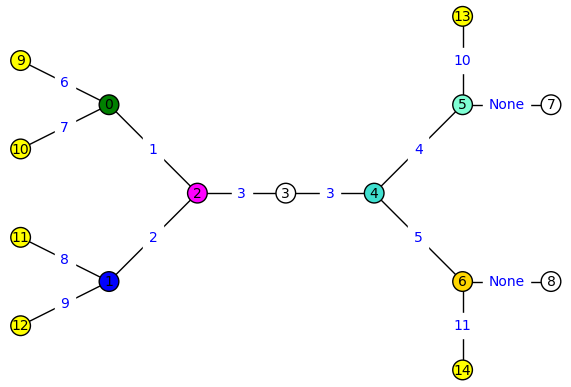

In [5]:
for j in Bamboos.keys():
    b=Bamboos[j]
    u=len(b)
    for k in range(u-1):
        G.set_edge_label(b[k],b[k+1],j.str())
Gbamboos=G.plot(edge_labels=True,vertex_colors=Gcolor)
Gbamboos

We setup the formula of the Screw Number of each bamboo, following the paper. For testing purposes, the plot GbamboosSN shows the screw numbers for each bamboo.

In [6]:
ScrewNumber={}
for j in Bamboos.keys():
    b=Bamboos[j]
    d=gcd([Vmult[i] for i in b])
    l=len(b)
    a=sum([1/Vmult[b[i]]/Vmult[b[i+1]] for i in (0..l-2)])
    ScrewNumber[j]=e*a*d

In [7]:
ScrewNumber

{1: 13, 2: 13, 3: 91, 4: 7, 5: 7, 6: 78, 7: 78, 8: 78, 9: 78, 10: 42, 11: 42}

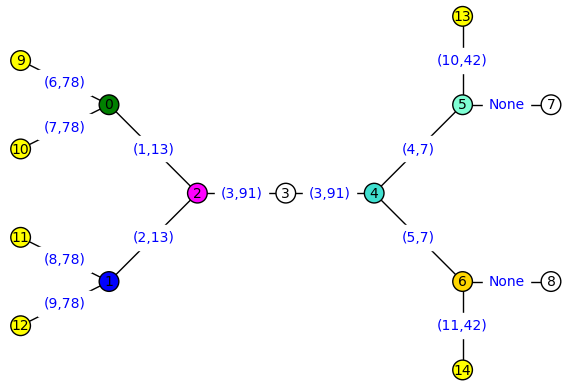

In [8]:
for j in Bamboos.keys():
    b=Bamboos[j]
    u=len(b)
    for k in range(u-1):
        G.set_edge_label(b[k],b[k+1],'('+j.str()+','+ScrewNumber[j].str()+')')
GbamboosSN=G.plot(edge_labels=True,vertex_colors=Gcolor)
GbamboosSN

We construct now the dual graph `NS` of the divisor of the semistable normalization. It can be made automatic but it is constructed manually for the examples. The vertices are preimages of the arrowheads (one for each) and the branching points (depending on `gcd`'s). We construct the graph by passing the edges with labels (numbers), admitting multiple edges between vertices.

The color code explains the relationship between the two graphs.

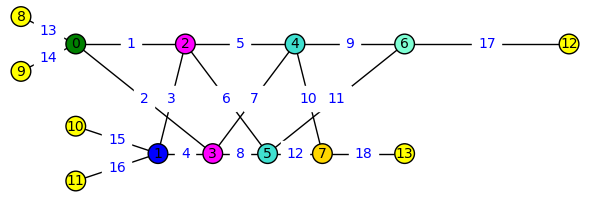

In [9]:
L0=[(0,2),(0,3),(1,2),(1,3),(2,4),(2,5),(3,4),(3,5),(4,6),(4,7),(5,6),(5,7),(0,8),(0,9),(1,10),(1,11),(6,12),(7,13)]
m=len(L0)
L=[]
j=0
for u in [1..len(L0)]:
    a,b=L0[u-1]
    j+=1
    L.append((a,b,j.str()))
NS=Graph(L)
NSv={8:(-4,1.5), 9:(-4,.5), 10:(-3,-.5), 11:(-3,-1.5), 12:(6,1), 13:(3,-1)}
for i in [0,2,4,6]:
    NSv[i]=((i-3),1)
    NSv[i+1]=((i-3)/2,-1)
NS.set_pos(NSv)
NScolor={'yellow': [8..13], 'green': [0], 'blue': [1], 'magenta':[2,3], 'turquoise': [4,5], 'aquamarine': [6], 'gold': [7]}
NSplot=NS.plot(edge_labels=True,vertex_colors=NScolor)
NSplot

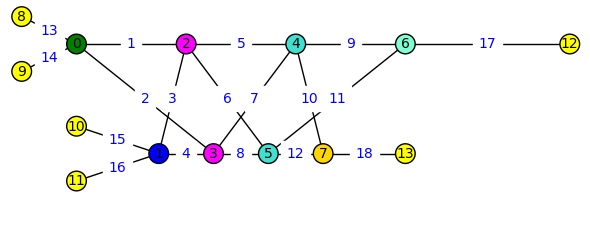

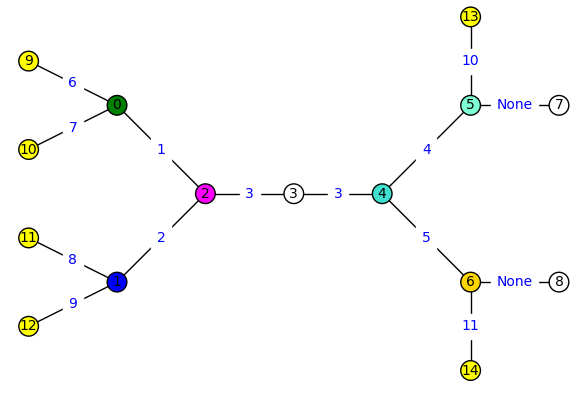

In [10]:
show(NSplot)
show(Gbamboos)

Each edge of `NS` is weighted with the screw number of its corresponding bamboo. This is done with the dictionnary `Edges2Bamboos`.

In [11]:
Edges2Bamboos={1:1, 2:1, 3:2, 4:2, 9:4, 10:5, 11:4, 12:5 }
for i in [5..8]:
    Edges2Bamboos[i]=3
for i in [13..18]:
    Edges2Bamboos[i]=i-7

The Screw Number determines a diagonal intersection form in the edges and arrows of the semistable normalization. We provide the matrix $Q_E$.

In [12]:
D=vector([ScrewNumber[Edges2Bamboos[i]] for i in [1..m]])
QE=diagonal_matrix(D)

Last step is to provide a basis for the relative homology of the dual graph of the semistable normalization. The matrix of $Q$ is given using this basis. For each element of the basis we consider the vector in the Free Abelian Group of Edges and Arrows and the matrix is computed. We draw the edges for each basis element in order to check no mistake has been introduced. The edges are oriented counterclockwise (the arrows are always oriented in the natural direction).

In [13]:
Base=[(1,-3,4,-2),(5,-7,8,-6),(9,-11,12,-10),(1,6,-8,-2),(5,10,-12,-6)]
Base+=[(-13,14),(-14,2,-4,15),(-15,16),(-13,1,5,9,17),(-16,4,8,12,18)]

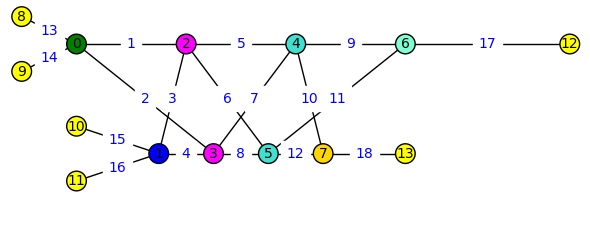

In [14]:
NSplot

In [15]:
def plotsubgraph(lista):
    lista1=[i.abs().str() for i in lista]
    aristas=[u for u in NS.edges() if u[2] in lista1]
    vrt1=[(u[0],u[1]) for u in aristas]
    vrt=list(Set(flatten(vrt1)))
    H=NS.subgraph(edges=aristas, algorithm='delete')
    return H.plot(edge_labels=True,vertex_colors=NScolor)

(1, -3, 4, -2)


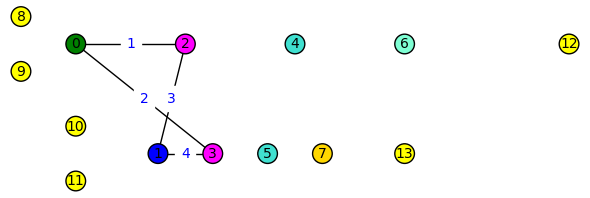



(5, -7, 8, -6)


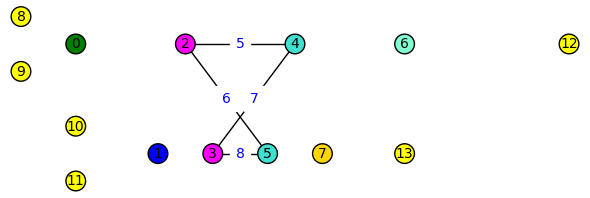



(9, -11, 12, -10)


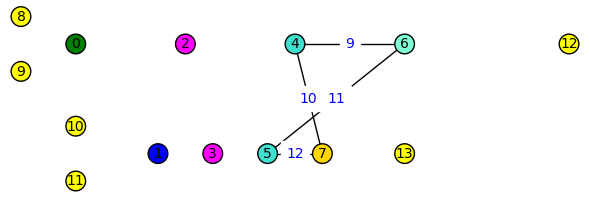



(1, 6, -8, -2)


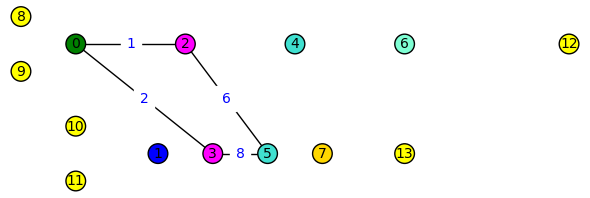



(5, 10, -12, -6)


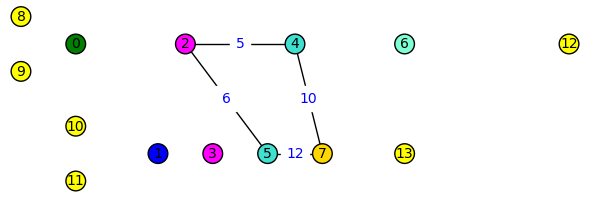



(-13, 14)


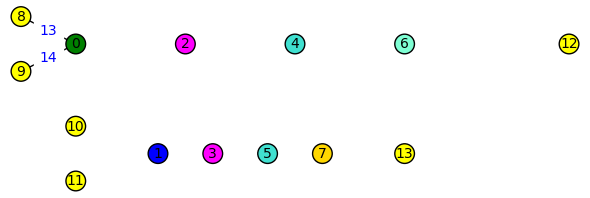



(-14, 2, -4, 15)


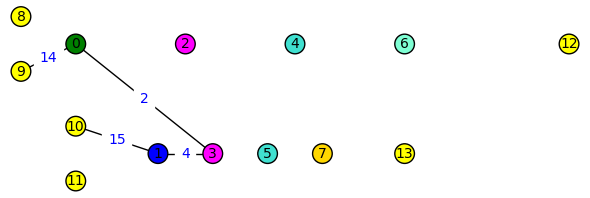



(-15, 16)


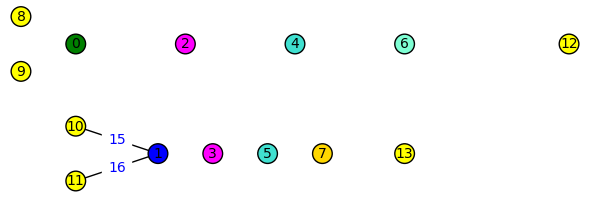



(-13, 1, 5, 9, 17)


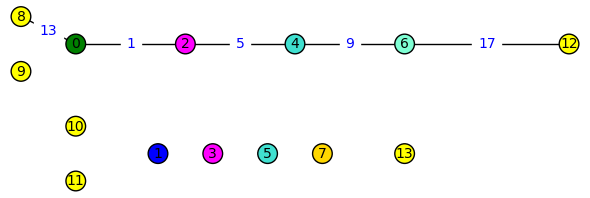



(-16, 4, 8, 12, 18)


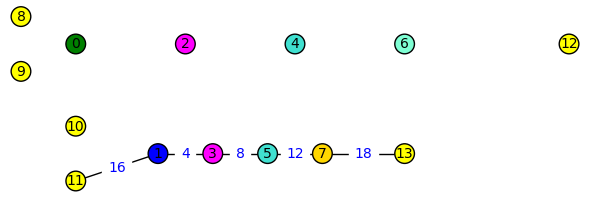

In [16]:
for u in Base:
    print(u)
    show(plotsubgraph(u))
    print("\n")

In [17]:
V=ZZ^m
def vct(lista):
    v=V(0)
    for i in lista:
        if i>0:
            v+=V.gen(i-1)
        if i<0:
            v=v-V.gen(-i-1)
    return v

In [18]:
Q=Matrix(len(Base),lambda i,j:vct(Base[i])*QE*vct(Base[j]))

In [19]:
show(Q)

[  52    0    0   26    0    0  -26    0   13   13]
[   0  364    0 -182  182    0    0    0   91   91]
[   0    0   28    0  -14    0    0    0    7    7]
[  26 -182    0  208  -91    0  -13    0   13  -91]
[   0  182  -14  -91  196    0    0    0   91   -7]
[   0    0    0    0    0  156  -78    0   78    0]
[ -26    0    0  -13    0  -78  182  -78    0  -13]
[   0    0    0    0    0    0  -78  156    0  -78]
[  13   91    7   13   91   78    0    0  231    0]
[  13   91    7  -91   -7    0  -13  -78    0  231]

Over the rational numbers, the determinant (up to squares) is an invariant.

In [20]:
Q.det().factor()

2^12 * 3^3 * 7^7 * 13^8